In [63]:
## load mdodules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, plot_roc_curve, ConfusionMatrixDisplay, RocCurveDisplay

In [3]:
## load dataset
telco_customer_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', index_col=0, na_values=' ')
telco_customer_churn.head(6)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [4]:
## dataset info
telco_customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [5]:
## data types
telco_customer_churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
## check for missingness before proceding
telco_customer_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

>- The dataset has 11 missing observations for the TotalCharges variable

In [7]:
telco_customer_churn.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## <center>Data Exploration<center>

In [8]:
## Explore the churn behavior by different features

## filter out only customers who churn
df_churn = telco_customer_churn[telco_customer_churn['Churn'] == 'Yes']
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


C:\Users\Sigma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


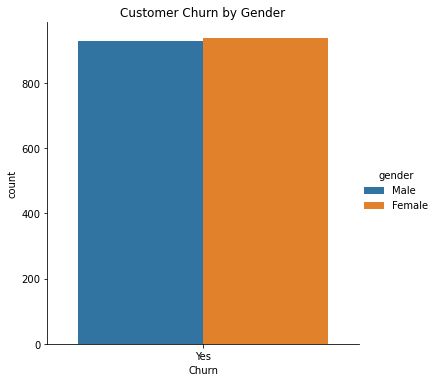

In [9]:
## Who are most likely to churn by gender
sns.catplot('Churn', hue='gender', data=df_churn, kind='count').set(title = 'Customer Churn by Gender')

>- On the other hand, the number of male male and female customers that churns is almost equal

C:\Users\Sigma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


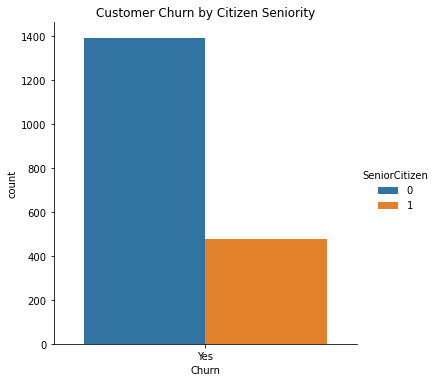

In [10]:
## Who are most likely to churn by seniority in citizenship
sns.catplot('Churn', hue='SeniorCitizen', data=df_churn, kind='count').set(title = 'Customer Churn by Citizen Seniority')

>- The chart indicates that non-senior citizens have higher likelihood of churn the telko company

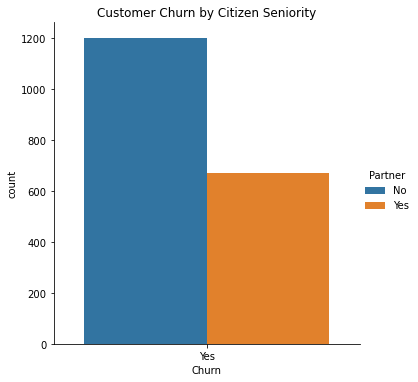

In [11]:
## Who are most likely to churn by partner
sns.catplot(x='Churn', hue='Partner', data=df_churn, kind='count').set(title = 'Customer Churn by Citizen Seniority')

>- The chart indicates that customers who don't have partners are more likely to churn the services than those who have the partners

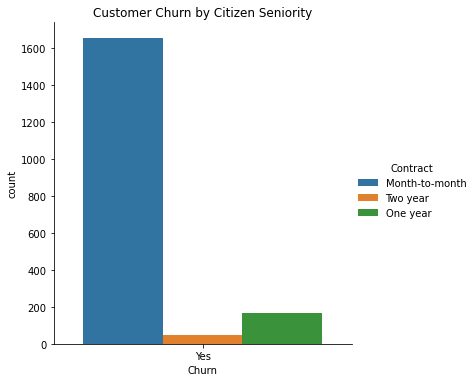

In [12]:
## Who are most likely to churn by seniority in citizenship
sns.catplot(x='Churn', hue='Contract', data=df_churn, kind='count').set(title = 'Customer Churn by Citizen Seniority')

>- The chart indicates that customer churn decreases as the contract period increases
>- The customers who have month-to-month contract type have the highest likelihood of churning while those who have two year contract (the maximum contract period) are the least likely to churn

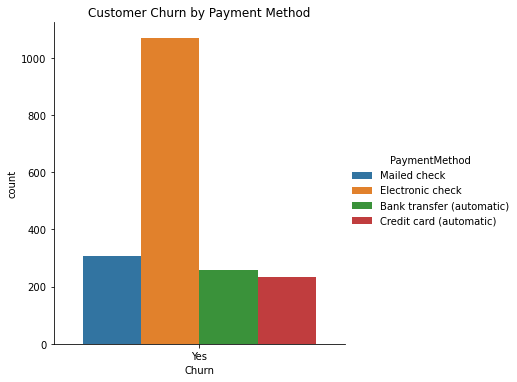

In [78]:
## Churn churn by payment method
sns.catplot(x='Churn', hue='PaymentMethod', data=df_churn, kind='count').set(title = 'Customer Churn by Payment Method')

>- The chart indicates that customers who use the Electronic check method are the most likely to churn while churn rate of the other method is lower and differs only slightly

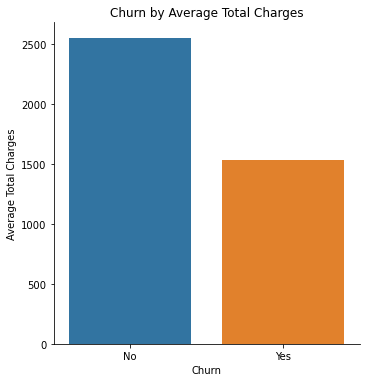

In [14]:
## Churn rate by average total charges
charges_churn = telco_customer_churn[['Churn', 'TotalCharges']].groupby('Churn', as_index=False).mean().rename(columns={'TotalCharges':'Average Total Charges'})
sns.catplot(x='Churn', y = 'Average Total Charges', data=charges_churn, kind='bar').set(title='Churn by Average Total Charges')

>- The chart indicates that those who have higher average Total charges are less likely to churn compred to those who have lower average charges

                 tenure  MonthlyCharges  TotalCharges
tenure          1.00000        0.247900      0.825880
MonthlyCharges  0.24790        1.000000      0.651065
TotalCharges    0.82588        0.651065      1.000000


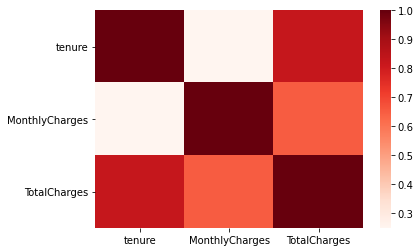

In [15]:
## Correlation coefficient
df_numerical = telco_customer_churn.select_dtypes('number').drop('SeniorCitizen', axis=1)
df_numerical.head()
## compute the correlational coefficients
cors = df_numerical.corr()
print(cors)
## heat map for correlation
sns.heatmap(cors, cmap='Reds')

>- There is no presence of multicollinearity

## <center>Data Preprocessing</center>

In [17]:
## Check the presence of duplicates
less_dups = telco_customer_churn.drop_duplicates()
print('Length with dups', telco_customer_churn.shape, '\n Length without dups', less_dups.shape)

Length with dups (7043, 20) 
 Length without dups (7021, 20)


>- The dataset had 22 duplicated variables which were dropped

In [18]:
## recode the target to binary 0, 1
less_dups['Churn']=np.where(less_dups['Churn'] == 'No', 0, 1)

<ipython-input-18-044fc8e95cfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  less_dups['Churn']=np.where(less_dups['Churn'] == 'No', 0, 1)


In [19]:
X_churn = less_dups.drop('Churn', axis=1)
y_churn = less_dups[['Churn']]


In [20]:
## split the data into training and test sizes
X_churn_train, X_churn_test, y_churn_train, y_churn_test = train_test_split(X_churn, y_churn, test_size=.2, random_state=2022)
## shape of the data
print('Training size', X_churn_train.shape, ' Test Size', X_churn_test.shape)
print('Target Training size', y_churn_train.shape, ' Target Test Size', y_churn_test.shape)

Training size (5616, 19)  Test Size (1405, 19)
Target Training size (5616, 1)  Target Test Size (1405, 1)


In [21]:
## preprocess the test data[features]

## dataframe for numeric variables

num_df = X_churn_train.select_dtypes('number').drop('SeniorCitizen', axis=1)

## dataframe for categorical variables

cat_df = X_churn_train.select_dtypes(exclude='number')

## create a pipeline for preprocessing the training data features

num_features_pipeline = Pipeline(
    [
        ('scaling', StandardScaler()),
        ('Imputer', SimpleImputer(strategy = 'mean'))
    ]
)


## create a pipeline
cat_features_pipeline = Pipeline(
    [
        ('One Hot Encode', OneHotEncoder())

    ]
)

## create a full pipeline

## create a list for the variables
num_features = list(num_df)
cat_features = list(cat_df)


## create the full pipeline

feature_prep_pipeline = ColumnTransformer(
    [
        ('num_pipeline', num_features_pipeline, num_features),
        ('cat_features', cat_features_pipeline, cat_features),

    ]
)

## transform the variables
features_preprocessed = feature_prep_pipeline.fit_transform(X_churn_train)

### <center><bold>SVM</bold></center>

In [32]:
## train the models

## set the parameter grid for random search
import scipy

param_grid = {'C': scipy.stats.expon(scale=10), 'gamma': scipy.stats.expon(scale=.1),\
    'kernel': ['rbf', 'linear']}

## SVM model
svm_clf = SVC(random_state=2022)

random_search = RandomizedSearchCV(estimator=svm_clf, param_distributions=param_grid,  n_iter=50, cv=10)

random_search.fit(features_preprocessed, y_churn_train)

C:\Users\Sigma\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sigma\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sigma\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sigma\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

RandomizedSearchCV(cv=10, estimator=SVC(random_state=2022), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019C65DAB1C0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019C65DAB280>,
                                        'kernel': ['rbf', 'linear']})

In [34]:
## model best parameters
random_search.best_params_

{'C': 5.762951979960786, 'gamma': 0.030202972996535418, 'kernel': 'rbf'}

In [36]:
## Transform the test data
X_test_transformed = feature_prep_pipeline.transform(X_churn_test)

In [47]:
## Using the best model
svm_best = random_search.best_estimator_
best_svm_preds = svm_best.predict(X_test_transformed)

In [48]:
## print the accuracy
print('Accuracy Score: ', accuracy_score(y_churn_test, best_svm_preds))


## AUC roc curve
print('Area Under Roc Curve: ',roc_auc_score(y_churn_test, random_search.decision_function(X_test_transformed)))

## metrics
svm_best_confusion_matrix = confusion_matrix(y_churn_test, best_svm_preds)
print('Confusion Matrix\n', svm_confusion_matrix)

Accuracy Score:  0.8021352313167259
Area Under Roc Curve:  0.7958604127657588
Confusion Matrix
 [[949  82]
 [196 178]]


C:\Users\Sigma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


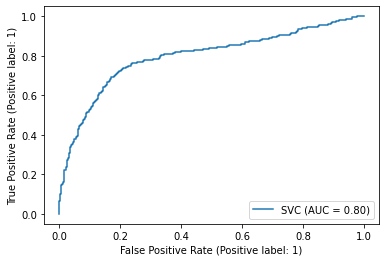

In [49]:
## plot the roccurve
plot_roc_curve(svm_best, X_test_transformed, y_churn_test)

### <center>Random Forest Classifier</center>

In [50]:
## set the parameter grid

random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}


## train the model
rf_clf = RandomForestClassifier(random_state=2022)

## fit the model

rf_random_search_clf = RandomizedSearchCV(estimator=rf_clf, param_distributions=random_grid, n_iter=50, cv=3, n_jobs=-1)

## fit the model
rf_random_search_clf.fit(features_preprocessed, y_churn_train)

C:\Users\Sigma\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2022),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]})

In [52]:
## model best parameters
rf_best_clf = rf_random_search_clf.best_estimator_

## Evaluate the model best parameters
best_rf_preds = rf_best_clf.predict(X_test_transformed)

In [55]:
## print the accuracy
print('Accuracy Score: ', accuracy_score(y_churn_test, best_rf_preds))


## metrics
rf_best_confusion_matrix = confusion_matrix(y_churn_test, best_rf_preds)
print('Confusion Matrix\n', rf_best_confusion_matrix)

Accuracy Score:  0.805693950177936
Confusion Matrix
 [[947  84]
 [189 185]]


C:\Users\Sigma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


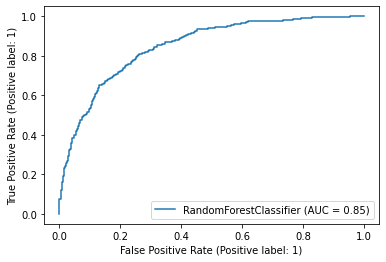

In [56]:
## ROC Curve and AUC
plot_roc_curve(rf_best_clf, X_test_transformed, y_churn_test)

>- Based on AUC Random forest performed better than the SVM classifier